#1 - Image Classification Test



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

Model-1 Sequential neural network from scratch

In [2]:
DATADIR = "/content/drive/MyDrive/Colab Notebooks/train_images"

CATEGORIES = ["spleen","small_intestine","skin_2", "skin_1","pancreas","lymph_node","lung","liver","kidney","endometrium_2","endometrium_1", "colon"]
#CATEGORIES = ["spleen","small_intestine"]

In [3]:
training_data = []
IMG_SIZE = 224

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # create path to the classes of images
        class_num = CATEGORIES.index(category)  # classification

        for img in tqdm(os.listdir(path)):  # iterate over each images
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()


100%|██████████| 79/79 [01:18<00:00,  1.00it/s]


In [4]:
DATADIR = "/content/drive/MyDrive/Colab Notebooks/test_images"

CATEGORIES = ["spleen","small_intestine","skin_2", "skin_1","pancreas","lymph_node","lung","liver","kidney","endometrium_2","endometrium_1", "colon"]
#CATEGORIES = ["spleen","small_intestine"]

In [5]:
testing_data = []
IMG_SIZE = 224

def create_testing_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # create path to classes of images
        class_num = CATEGORIES.index(category)  # classification  

        for img in tqdm(os.listdir(path)):  # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                testing_data.append([new_array, class_num])
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_testing_data()


100%|██████████| 50/50 [00:47<00:00,  1.04it/s]


In [6]:
train_images = []
train_labels = []
for features,label in training_data:
    train_images.append(features)
    train_labels.append(label)



train_images = np.array(train_images)
train_labels = np.asarray(train_labels).astype(np.float32)

In [7]:
test_images = []
test_labels = []

for features,label in testing_data:
    test_images.append(features)
    test_labels.append(label)


test_images = np.array(test_images)
test_labels = np.asarray(test_labels).astype(np.float32)

In [59]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(224, 224)),
    keras.layers.Dense(1024, activation='relu',kernel_initializer='glorot_uniform'),
    keras.layers.Dense(1024, activation='relu',kernel_initializer='glorot_uniform'),
    keras.layers.Dense(1024, activation='relu',kernel_initializer='glorot_uniform'),
    keras.layers.Dense(1024, activation='relu',kernel_initializer='glorot_uniform'),
    keras.layers.Dense(1024, activation='relu',kernel_initializer='glorot_uniform'),
    keras.layers.Dense(12,activation='softmax',kernel_initializer='glorot_uniform')
])

In [60]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.00005
),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [61]:
model1 = model.fit(train_images, train_labels, epochs=200,batch_size=64,shuffle=True)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 1s 18ms/step - loss: 355.8413 - accuracy: 0.0675
Epoch 2/200
15/15 [==============================] - 0s 16ms/step - loss: 236.2194 - accuracy: 0.0854
Epoch 3/200
15/15 [==============================] - 0s 16ms/step - loss: 172.5499 - accuracy: 0.0844
Epoch 4/200
15/15 [==============================] - 0s 16ms/step - loss: 130.5986 - accuracy: 0.0981
Epoch 5/200
15/15 [==============================] - 0s 15ms/step - loss: 114.5028 - accuracy: 0.1203
Epoch 6/200
15/15 [==============================] - 0s 15ms/step - loss: 88.3054 - accuracy: 0.1002
Epoch 7/200
15/15 [==============================] - 0s 16ms/step - loss: 82.9304 - accuracy: 0.1097
Epoch 8/200
15/15 [==============================] - 0s 15ms/step - loss: 50.6060 - accuracy: 0.1224
Epoch 9/200
15/15 [==============================] - 0s 16ms/step - loss: 60.3988 - accuracy: 0.1319
Epoch 10/200
15/15 [==============================] - 0s 16ms/step - loss: 50.3853 - accuracy: 0.1

In [63]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)

print('\nTrain accuracy:', train_acc)

30/30 - 0s - loss: 1.9820 - accuracy: 0.2120 - 128ms/epoch - 4ms/step

Train accuracy: 0.21202531456947327


In [64]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

19/19 - 0s - loss: 2.2894 - accuracy: 0.1883 - 90ms/epoch - 5ms/step

Test accuracy: 0.18833333253860474


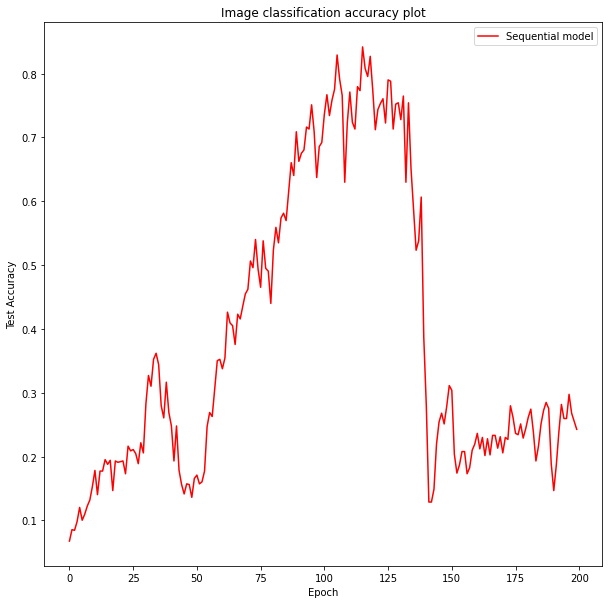

In [65]:
plt.figure(figsize=(10,10))
plt.plot(model1.history['accuracy'],'r',label='Sequential model')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Image classification accuracy plot')
plt.legend()

In [66]:
model.layers[1]._name = "layer1"
model.layers[2]._name = "layer2"
model.layers[3]._name = "layer3"
model.layers[4]._name = "layer4"
model.layers[5]._name = "layer5"

In [67]:
from sklearn.manifold import TSNE
import pandas as pd
def tSNEplot(images,labels):
  reduceddim = TSNE(2)
  reduceddimX = reduceddim.fit_transform(images)
  reduceddimX_pd = pd.DataFrame({'tsne1':reduceddimX[:,0],'tsne2':reduceddimX[:,1]})

  fig,axs = plt.subplots(1,1,figsize=(10,10))
  axs.set_xlabel("tSNE component 1")
  axs.set_ylabel("tSNE component 2")
  axs.set_title("tSNE output 2 components")
  for i in range(10):
    color = 'C'+str(i)
    point = labels == i
    axs.scatter(x = reduceddimX_pd.loc[point,'tsne1'], y = reduceddimX_pd.loc[point,'tsne2'], c = color)
    axs.annotate(i,reduceddimX_pd.loc[point,['tsne1','tsne2']].mean(),size = 15,color='k',weight="bold")
  axs.grid()

In [74]:
from sklearn.manifold import TSNE
import pandas as pd
def tSNEplotoverlap(images1,labels1, images2,labels2):
  reduceddim = TSNE(2)
  reduceddimX = reduceddim.fit_transform(images1)
  reduceddimY = reduceddim.fit_transform(images2)
  reduceddimX_pd = pd.DataFrame({'tsne1':reduceddimX[:,0],'tsne2':reduceddimX[:,1]})
  reduceddimY_pd = pd.DataFrame({'tsne1':reduceddimY[:,0],'tsne2':reduceddimY[:,1]})

  fig,axs = plt.subplots(1,1,figsize=(10,10))
  axs.set_xlabel("tSNE component 1")
  axs.set_ylabel("tSNE component 2")
  axs.set_title("tSNE output on train and test dataset")
  for i in range(12):
    color1 = 'C'+str(i)
    point1 = labels1 == i
    color2 = 'C'+str(i)
    point2 = labels2 == i
    axs.scatter(x = reduceddimX_pd.loc[point1,'tsne1'], y = reduceddimX_pd.loc[point1,'tsne2'], c = color1, label = 'train')
    axs.scatter(x = reduceddimY_pd.loc[point2,'tsne1'], y = reduceddimY_pd.loc[point2,'tsne2'], c = color2, label = 'test')
    axs.annotate(i,reduceddimX_pd.loc[point1,['tsne1','tsne2']].mean(),size = 15,color='k',weight="bold", label = 'train')
    axs.annotate(i,reduceddimY_pd.loc[point2,['tsne1','tsne2']].mean(),size = 15,color='b',weight="bold", label ='test')
  axs.grid()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


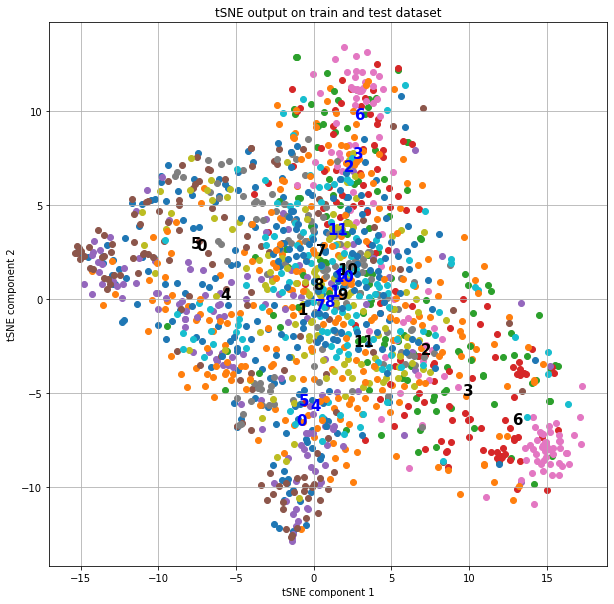

In [75]:
trainimg=train_images[:1000].reshape(len(train_images),-1)
testimg=test_images[:1000].reshape(len(test_images),-1)
tSNEplotoverlap(trainimg,train_labels,testimg,test_labels)

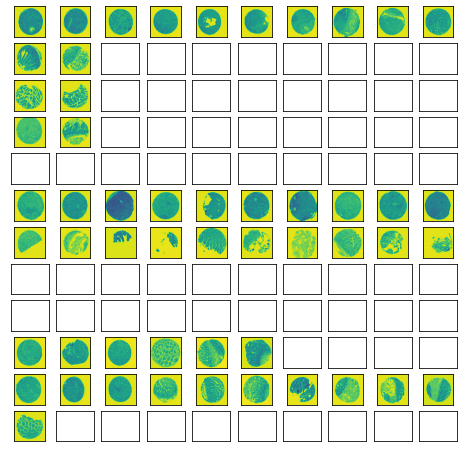

In [76]:
fig,axs = plt.subplots(12,10,figsize=(8,8))
colnum = np.zeros((12),dtype=int) #to keep track of column
predicted_vec = model.predict(test_images[:1000]) #predicting for 1000 images
rownumvec=np.argmax(predicted_vec,axis=1) # taking class with max probability
for i in range(100):
  rownum = rownumvec[i]
  # print(rownum,colnum[rownum])
  if colnum[rownum]<10:
    axs[rownum,colnum[rownum]].imshow(test_images[i])
  colnum[rownum]+=1
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


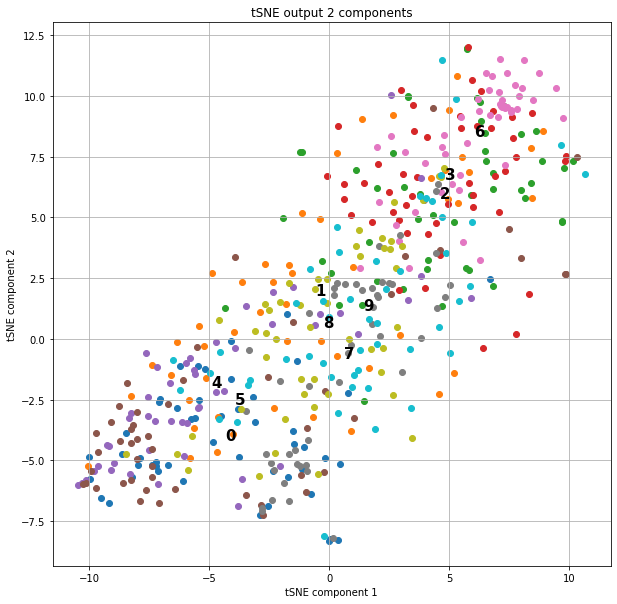

In [77]:
testimg=test_images[:1000].reshape(len(test_images),-1)
tSNEplot(testimg,test_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


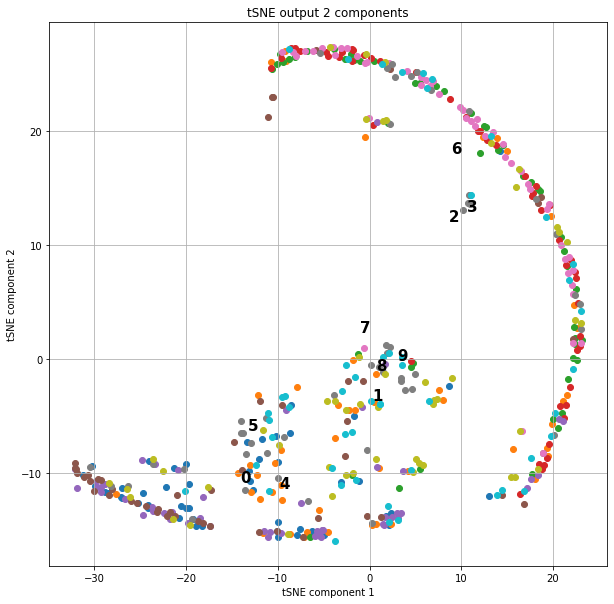

In [78]:
layer1=model.get_layer("layer1").output
layer1_model=tf.keras.models.Model(inputs=model.input,outputs=layer1)
layer1_pred=layer1_model.predict(test_images)
tSNEplot(layer1_pred,test_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


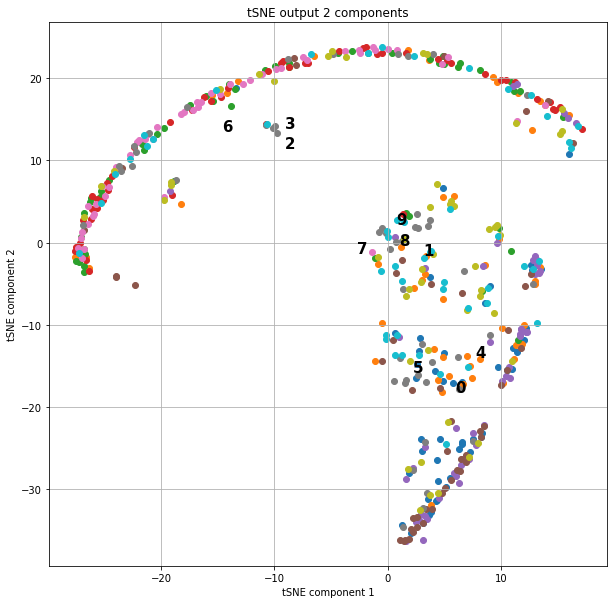

In [79]:
layer2=model.get_layer("layer2").output
layer2_model=tf.keras.models.Model(inputs=model.input,outputs=layer2)
layer2_pred=layer2_model.predict(test_images)
tSNEplot(layer2_pred,test_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


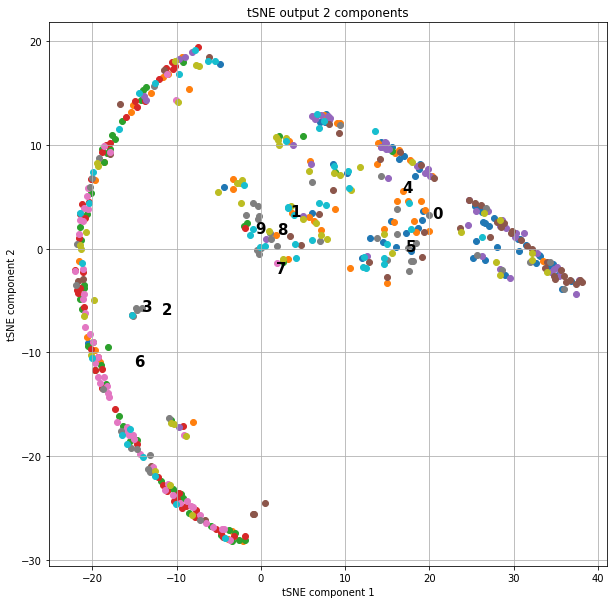

In [80]:
layer3=model.get_layer("layer3").output
layer3_model=tf.keras.models.Model(inputs=model.input,outputs=layer3)
layer3_pred=layer3_model.predict(test_images)
tSNEplot(layer3_pred,test_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


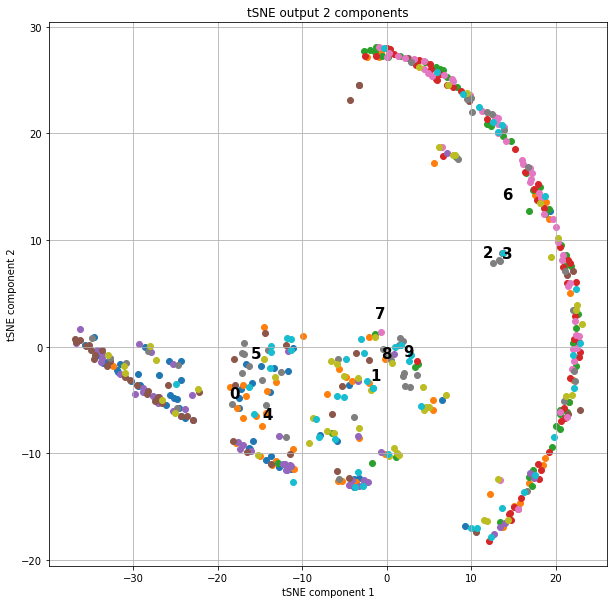

In [81]:
layer4=model.get_layer("layer4").output
layer4_model=tf.keras.models.Model(inputs=model.input,outputs=layer4)
layer4_pred=layer4_model.predict(test_images)
tSNEplot(layer4_pred,test_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


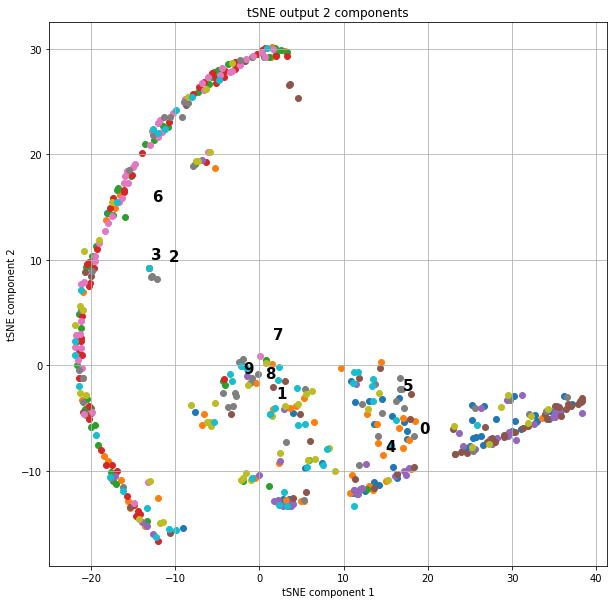

In [82]:
layer5=model.get_layer("layer5").output
layer5_model=tf.keras.models.Model(inputs=model.input,outputs=layer5)
layer5_pred=layer5_model.predict(test_images)
tSNEplot(layer5_pred,test_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


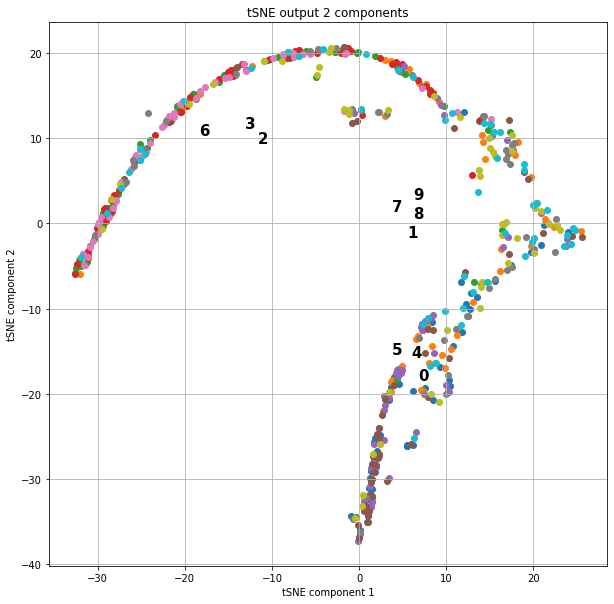

In [83]:
op_pred = model.predict(test_images)
tSNEplot(op_pred,test_labels)

In [47]:
train_images.shape

(948, 224, 224)

In [51]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=10, kernel_size=(5,5), padding='valid', strides=1, activation='relu',kernel_initializer='he_normal', input_shape=(224,224,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='valid', strides=2))
model.add(tf.keras.layers.Conv2D(filters=10, kernel_size=(5,5), padding='valid', strides=1, activation='relu',kernel_initializer='he_normal'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='valid', strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(20, activation='relu',kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(12, activation='softmax',kernel_initializer='he_normal'))
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_CNN = model.fit(train_images, train_labels, epochs = 200, batch_size = 64,validation_data=(test_images,test_labels))

Epoch 1/200


ValueError: ignored

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(fit_data.history['val_accuracy'], color='blue', label='Validation_accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Reference: https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/

In [84]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [89]:
DATADIR = "/content/drive/MyDrive/Colab Notebooks/train_images"

CATEGORIES = ["spleen","small_intestine","skin_2", "skin_1","pancreas","lymph_node","lung","liver","kidney","endometrium_2","endometrium_1", "colon"]


In [91]:
training_data = []
#train_images = []
#train_labels = []
IMG_SIZE = 224

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  # classification

        for img in tqdm(os.listdir(path)):  # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

print(len(training_data))

100%|██████████| 79/79 [01:16<00:00,  1.04it/s]

948


In [92]:
DATADIR = "/content/drive/MyDrive/Colab Notebooks/test_images"

CATEGORIES = ["spleen","small_intestine","skin_2", "skin_1","pancreas","lymph_node","lung","liver","kidney","endometrium_2","endometrium_1", "colon"]


In [93]:
testing_data = []
#train_images = []
#train_labels = []
IMG_SIZE = 224

def create_testing_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  #
        class_num = CATEGORIES.index(category)  # get the classification  

        for img in tqdm(os.listdir(path)):  # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                testing_data.append([new_array, class_num])
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_testing_data()

print(len(testing_data))

100%|██████████| 50/50 [00:50<00:00,  1.00s/it]

600


In [94]:
train_images = []
train_labels = []
for features,label in training_data:
    train_images.append(features)
    train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.asarray(train_labels).astype(np.float32)

In [95]:
test_images = []
test_labels = []
for features,label in testing_data:
    test_images.append(features)
    test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.asarray(test_labels).astype(np.float32)

In [96]:
test_images.shape, test_labels.shape
train_images.shape, train_labels.shape

((948, 224, 224, 3), (948,))

In [97]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.00005
),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [99]:
model2 = model.fit(train_images, train_labels, epochs=200,batch_size=64,shuffle=True)

Epoch 1/200
15/15 [==============================] - 13s 861ms/step - loss: 1.0950 - accuracy: 0.6065
Epoch 2/200
15/15 [==============================] - 13s 873ms/step - loss: 0.5145 - accuracy: 0.8259
Epoch 3/200
15/15 [==============================] - 13s 874ms/step - loss: 0.2657 - accuracy: 0.9040
Epoch 4/200
15/15 [==============================] - 13s 868ms/step - loss: 0.1288 - accuracy: 0.9557
Epoch 5/200
15/15 [==============================] - 13s 865ms/step - loss: 0.0478 - accuracy: 0.9905
Epoch 6/200
15/15 [==============================] - 13s 866ms/step - loss: 0.0217 - accuracy: 0.9958
Epoch 7/200
15/15 [==============================] - 13s 866ms/step - loss: 0.0150 - accuracy: 0.9958
Epoch 8/200
15/15 [==============================] - 13s 867ms/step - loss: 0.2345 - accuracy: 0.9304
Epoch 9/200
15/15 [==============================] - 13s 867ms/step - loss: 0.0928 - accuracy: 0.9684
Epoch 10/200
15/15 [==============================] - 13s 867ms/step - loss: 0.027

In [100]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)

print('\nTrain accuracy:', train_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


30/30 - 9s - loss: 6.9664e-08 - accuracy: 1.0000 - 9s/epoch - 310ms/step

Train accuracy: 1.0


In [101]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

19/19 - 5s - loss: 1.7084 - accuracy: 0.7833 - 5s/epoch - 268ms/step

Test accuracy: 0.7833333611488342


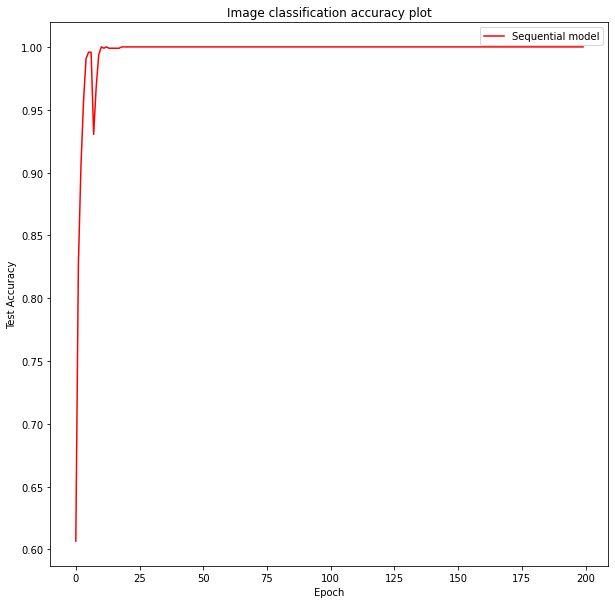

In [104]:
plt.figure(figsize=(10,10))
plt.plot(model2.history['accuracy'],'r',label='Sequential model')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Image classification accuracy plot')
plt.legend()

In [102]:
model.layers[1]._name = "layer1"
model.layers[2]._name = "layer2"
model.layers[3]._name = "layer3"
model.layers[4]._name = "layer4"
model.layers[5]._name = "layer5"

In [105]:
from sklearn.manifold import TSNE
import pandas as pd
def tSNEplot(images,labels):
  reduceddim = TSNE(2)
  reduceddimX = reduceddim.fit_transform(images)
  reduceddimX_pd = pd.DataFrame({'tsne1':reduceddimX[:,0],'tsne2':reduceddimX[:,1]})

  fig,axs = plt.subplots(1,1,figsize=(10,10))
  axs.set_xlabel("tSNE component 1")
  axs.set_ylabel("tSNE component 2")
  axs.set_title("tSNE output 2 components")
  for i in range(10):
    color = 'C'+str(i)
    point = labels == i
    axs.scatter(x = reduceddimX_pd.loc[point,'tsne1'], y = reduceddimX_pd.loc[point,'tsne2'], c = color)
    axs.annotate(i,reduceddimX_pd.loc[point,['tsne1','tsne2']].mean(),size = 15,color='k',weight="bold")
  axs.grid()

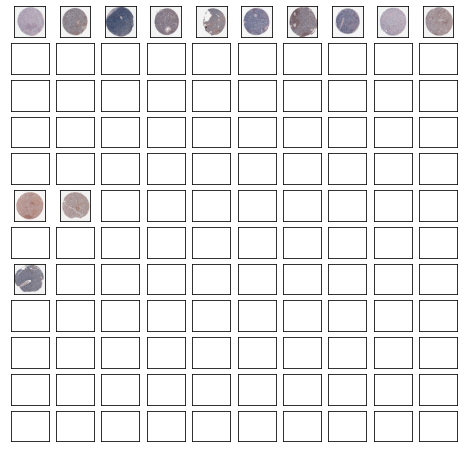

In [107]:
fig,axs = plt.subplots(12,10,figsize=(8,8))
colnum = np.zeros((12),dtype=int) #to keep track of column
predicted_vec = model.predict(test_images[:30]) #predicting for 1000 images
rownumvec=np.argmax(predicted_vec,axis=1) # taking class with max probability
for i in range(30):
  rownum = rownumvec[i]
  # print(rownum,colnum[rownum])
  if colnum[rownum]<10:
    axs[rownum,colnum[rownum]].imshow(test_images[i])
  colnum[rownum]+=1
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


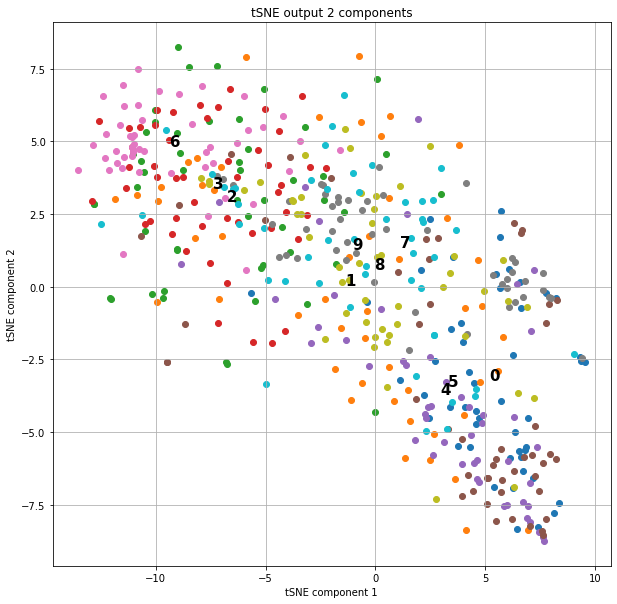

In [108]:
testimg=test_images[:1000].reshape(len(test_images),-1)
tSNEplot(testimg,test_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


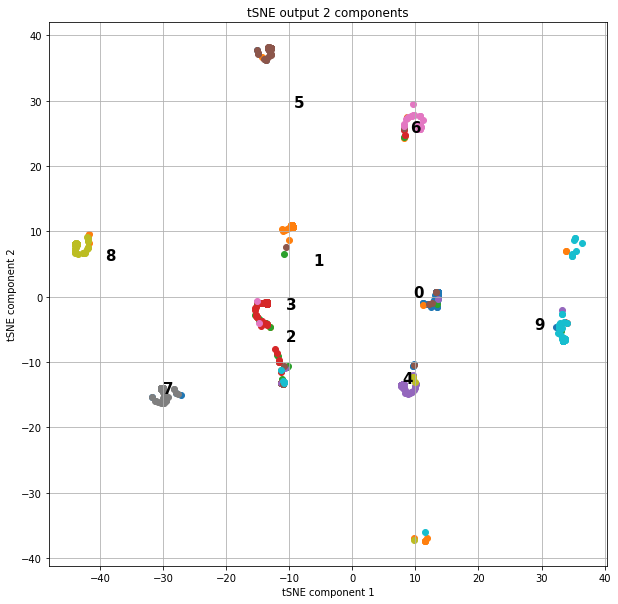

In [112]:
op_pred = model.predict(test_images)
tSNEplot(op_pred,test_labels)

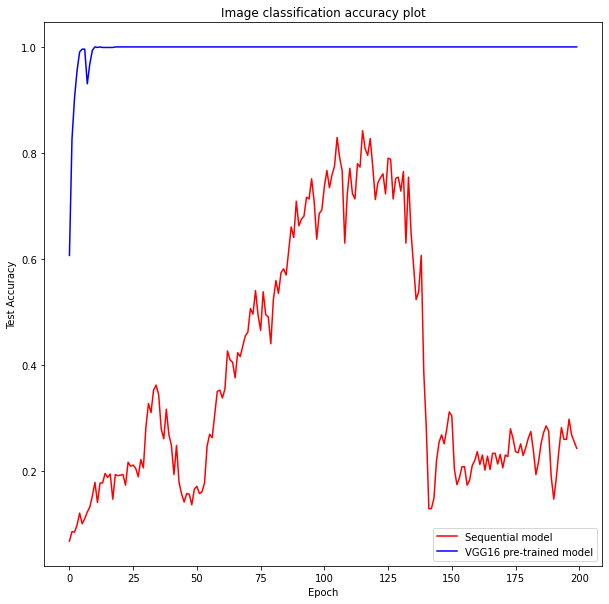

In [113]:
plt.figure(figsize=(10,10))
plt.plot(model1.history['accuracy'],'r',label='Sequential model')
plt.plot(model2.history['accuracy'],'b',label='VGG16 pre-trained model')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Image classification accuracy plot')
plt.legend()